In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [6]:
def accumulate_avg(data_array):

    number_elements = np.arange(1,len(data_array)+1)
    cumulative_sum = np.cumsum(data_array)

    return cumulative_sum/number_elements

In [13]:
initial_state_1 = 'totXT-H'
initial_state_2 = 'XT-H'
initial_state_3 = 'H-CT'

analysis_path_1 = f'/scratch2/fivanovic/T6-PDI-1D/nace_analysis_files/{initial_state_1}_output_avg_arrays/'
analysis_path_2 = f'/scratch2/fivanovic/T6-PDI-1D/nace_analysis_files/{initial_state_2}_output_avg_arrays/'
analysis_path_3 = f'/scratch2/fivanovic/T6-PDI-1D/nace_analysis_files/{initial_state_3}_output_avg_arrays/'

In [14]:
nace_averages_1 = np.loadtxt(analysis_path_1 + f'{initial_state_1}_avg_wnaces.txt')
nace_averages_2 = np.loadtxt(analysis_path_2 + f'{initial_state_2}_avg_wnaces.txt')
nace_averages_3 = np.loadtxt(analysis_path_3 + f'{initial_state_3}_avg_wnaces.txt')
distance_bins = np.arange(10,200,20)

label_list = ['(1)', '(4)', '(2)', '(3)', '(5)', '(6)']
colour_list = ['darkcyan', 'blue', 'purple', 'plum', 'gold', 'tomato']

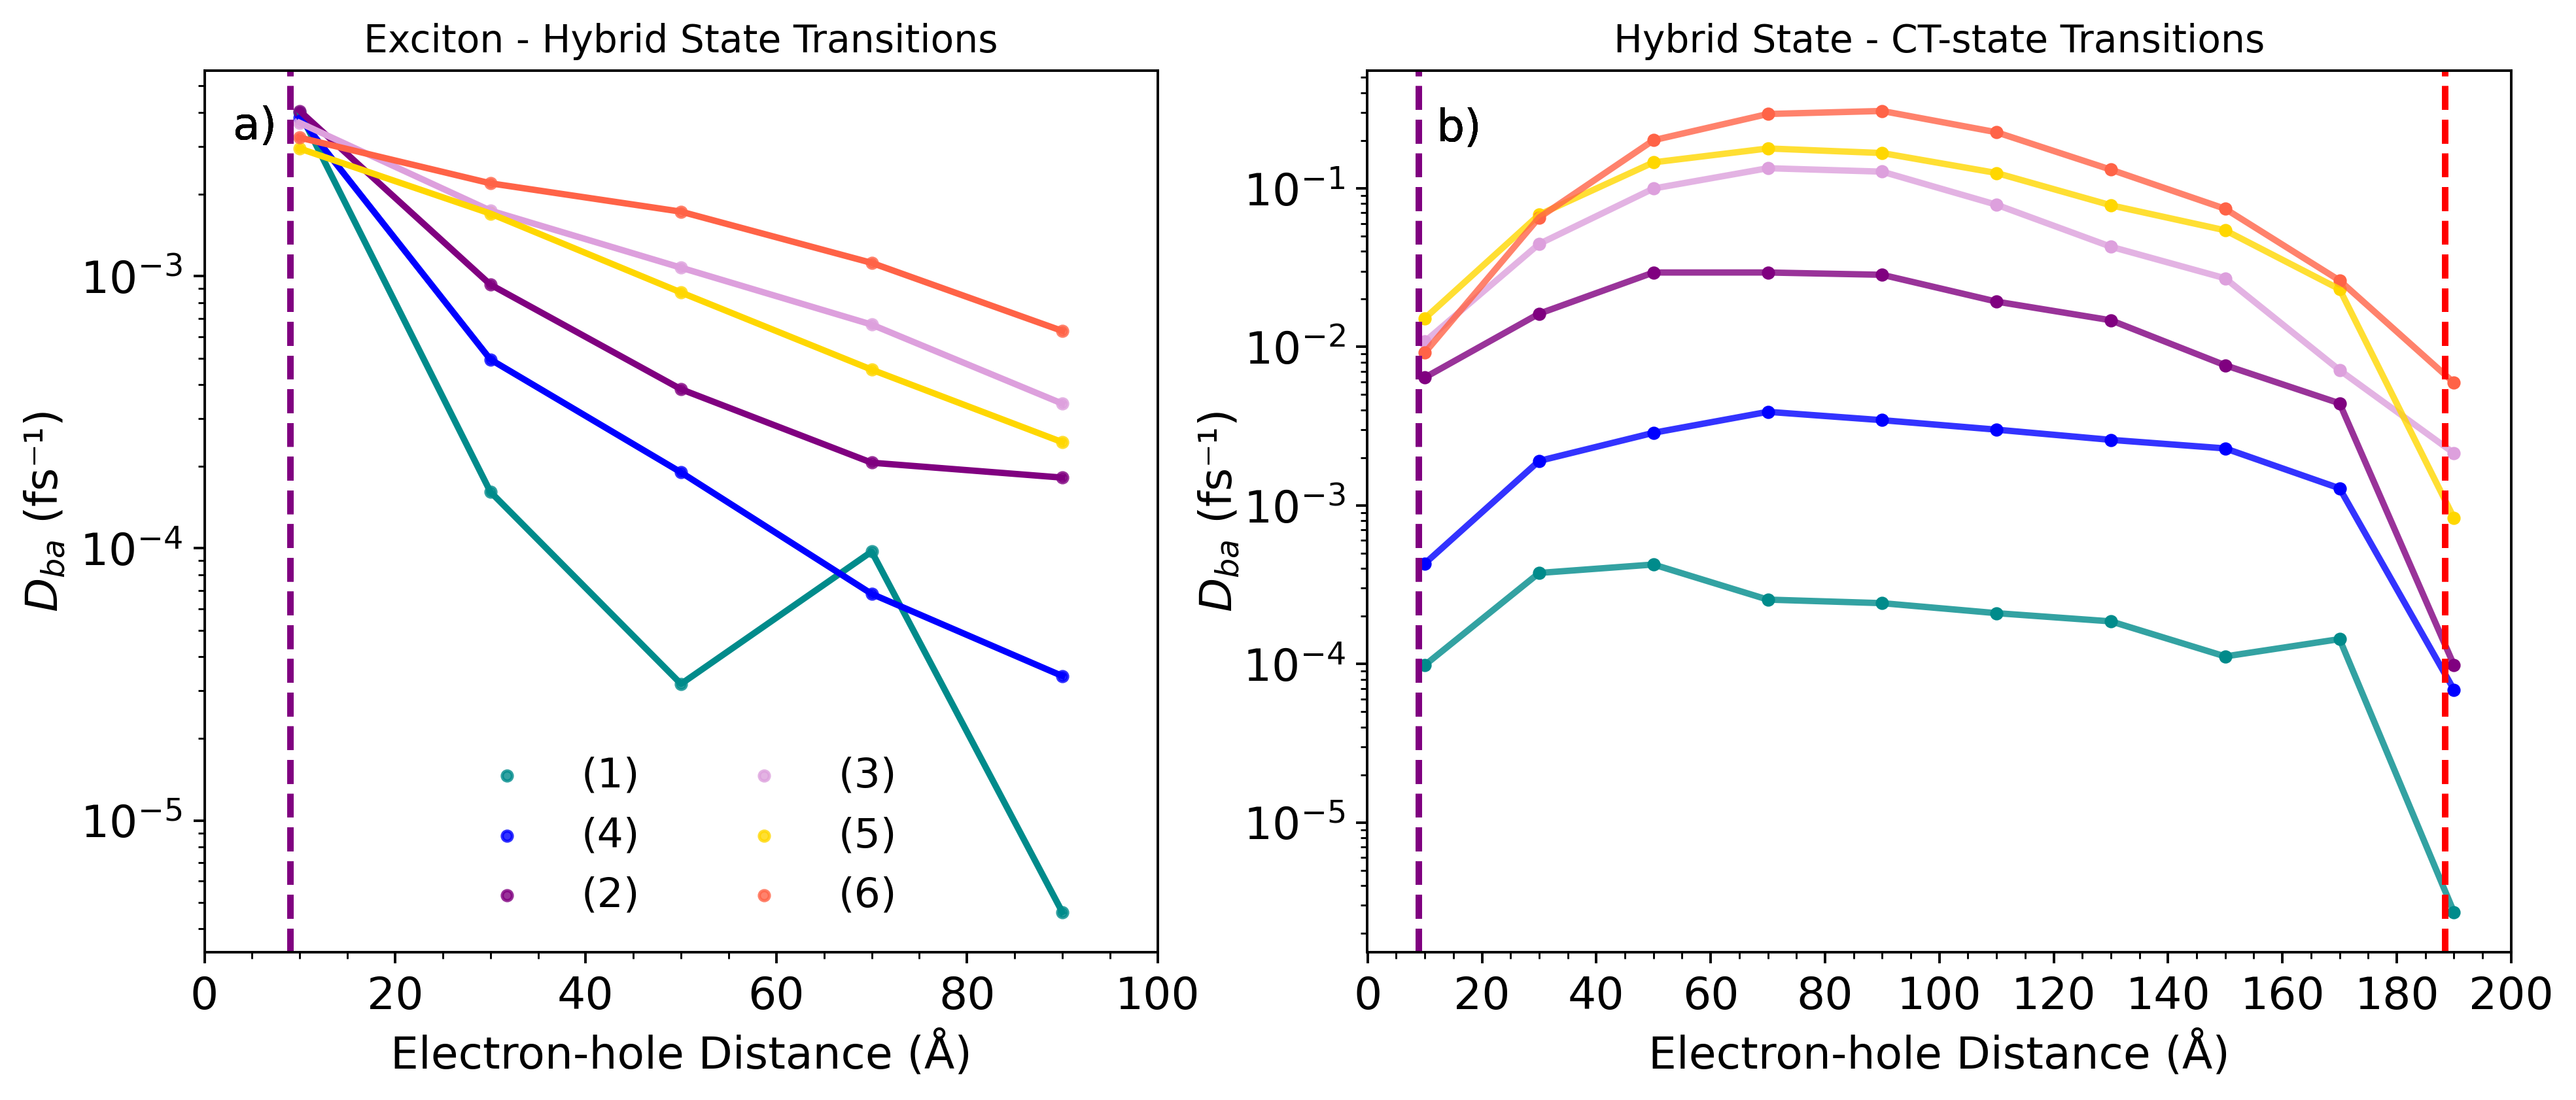

In [26]:
fig = plt.figure(figsize=(13, 5), rasterized=True, dpi=350)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
#ax3 = plt.subplot(gs[:, 1])

short_xticks = np.arange(0,120,20)
long_xticks = np.arange(0,220,20)

for index in range(len(label_list)):
    ax1.plot(distance_bins[:5], nace_averages_1[index][:5], color=f'{colour_list[index]}', alpha=1, linewidth=2)
    ax1.scatter(distance_bins[:5], nace_averages_1[index][:5], color=f'{colour_list[index]}', s=10, alpha=0.8, label=f'{label_list[index]}')
    ax1.set_yscale('log')
    ax1.yaxis.set_tick_params(labelsize = 14)
    ax1.xaxis.set_tick_params(labelsize = 14)
    ax1.minorticks_on()
    ax1.set_title('Exciton - Hybrid State Transitions')
    ax1.axvline(9, linewidth=2, color='purple', linestyle='--')
    ax1.set_xticks(short_xticks)
    ax1.set_xlabel('Electron-hole Distance (\u212B)', fontsize=14)
    ax1.set_ylabel('$D_{ba}$ (fs\u207B\u00B9)', fontsize=14)
    ax1.text(3, 0.0032, 'a)', fontsize=14)

    '''
    ax2.scatter(distance_bins[:5], nace_averages_2[index][:5], color=f'{colour_list[index]}', s=10, alpha=0.8)
    ax2.plot(distance_bins[:5], nace_averages_2[index][:5], color=f'{colour_list[index]}', alpha=0.8)
    ax2.set_yscale('log')
    ax2.set_xticks(distance_bins[:5])
    ax2.minorticks_on()
    ax2.yaxis.set_tick_params(labelsize = 14)
    ax2.xaxis.set_tick_params(labelsize = 14)
    ax2.set_title('Non-interfacial Excitons - Hybrid States')
    ax2.axvline(9, linewidth=2, color='purple', linestyle='--')
    '''

    ax2.scatter(distance_bins, nace_averages_3[index], color=f'{colour_list[index]}', s=10, alpha=1)
    ax2.plot(distance_bins, nace_averages_3[index], color=f'{colour_list[index]}', alpha=0.8, linewidth=2)
    ax2.set_yscale('log')
    ax2.set_xticks(long_xticks)
    ax2.minorticks_on()
    ax2.yaxis.set_tick_params(labelsize = 14)
    ax2.xaxis.set_tick_params(labelsize = 14)
    ax2.set_title('Hybrid State - CT-state Transitions')
    ax2.axvline(9, linewidth=2, color='purple', linestyle='--')
    ax2.axvline(188.5, linewidth=2, color='r', linestyle='--')
    ax2.set_xlabel('Electron-hole Distance (\u212B)', fontsize=14)
    ax2.set_ylabel('$D_{ba}$ (fs\u207B\u00B9)', fontsize=14, labelpad=0.45)
    ax2.text(12, 0.2, 'b)', fontsize=14)

ax1.legend(fontsize=13, loc='lower center', frameon=False, ncols=2)

#ax2.axis('off')

#fig.set_tight_layout(tight=0.9)

/tmp/ipykernel_62350/3920709867.py:7: UserWarning: loadtxt: input contained no data: "/scratch2/fivanovic/T6-PDI-1D/nace_analysis_files/iXT-H_output_avg_arrays/accumulated_averages/e3.5_3xCT_200_acc_avg_dr_iXT-H_naces.txt"
  obs_array = np.loadtxt(analysis_path_1 +  f'accumulated_averages/{simulation_type}_{distance_bins[k]}_acc_avg_dr_{initial_state_1}_{observable}.txt')


Text(0.5, 1.0, 'Accumulated Average Weighted NACE - E$_b$ = 0.26eV - 3xCT CT-coupling')

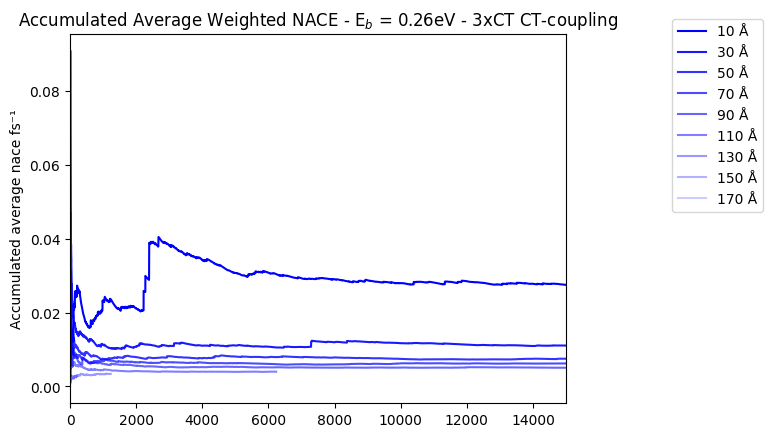

In [7]:
simulation_type = 'e3.5_3xCT'
observable = 'naces'
distance_bins = np.arange(0,220,20)[1:]

for k in range(len(distance_bins)):

    obs_array = np.loadtxt(analysis_path_1 +  f'accumulated_averages/{simulation_type}_{distance_bins[k]}_acc_avg_dr_{initial_state_1}_{observable}.txt')
    shading = 1 - k/len(distance_bins)

    if np.any(obs_array):
        try:
            plt.plot(np.arange(len(obs_array)), obs_array, color = 'b', alpha=shading, label = f'{distance_bins[k]-10} \u212B')
        except:
            continue

#plt.ylim([0.01,-0.025])
plt.ylabel('Accumulated average nace fs\u207B\u00B9')
plt.xlim([0,15000])
plt.legend(bbox_to_anchor = (1.2,0.5))
plt.title('Accumulated Average Weighted NACE - E$_b$ = 0.26eV - 3xCT CT-coupling')

In [8]:
def accumulate_avg(data_array):

    number_elements = np.arange(1,len(data_array)+1)
    cumulative_sum = np.cumsum(data_array)

    return cumulative_sum/number_elements

In [9]:
def accumulated_avg_by_distance(total_array, ipr_index, distance_index):

    distance_bins = np.arange(0,220,20)[1:]
    binned_ipr = [[] for k in distance_bins]
    
    for k in range(len(total_array)):

        ipr = total_array[k, ipr_index]
        eh_distance = total_array[k, distance_index]

        for i in range(len(distance_bins)):
            bin = distance_bins[i]

            if eh_distance < bin:
                binned_ipr[i].append(ipr)
                break

    return [accumulate_avg(ipr) for ipr in binned_ipr]

In [10]:
def resolve_observable_by_distance(total_array, observable_index, distance_index, bins):

    binned_obs = [[] for k in bins]
    
    for k in range(len(total_array)):

        obs = total_array[k, observable_index]
        eh_distance = total_array[k, distance_index]

        for i in range(len(bins)):
            bin = bins[i]

            if eh_distance < bin:
                binned_obs[i].append(obs)
                break

    return [np.mean(ob) for ob in binned_obs]

In [11]:
hybrid_path = '/scratch2/fivanovic/T6-PDI-1D/nace_analysis_files/hybrid_state_info/'
file_tags = ['physopt_retry', 'e3.5_2xCT', 'e3.5_3xCT', 'e5', 'e5_2xCT', 'e5_3xCT', 'e10']

hybrid_arrays = [np.loadtxt(f'{hybrid_path}' + f'{tag}_hybrid_info.txt') for tag in file_tags]
#active_hybrid_arrays = [np.loadtxt(f'{hybrid_path}' + f'{tag}_active_hybrid_info.txt') for tag in file_tags]

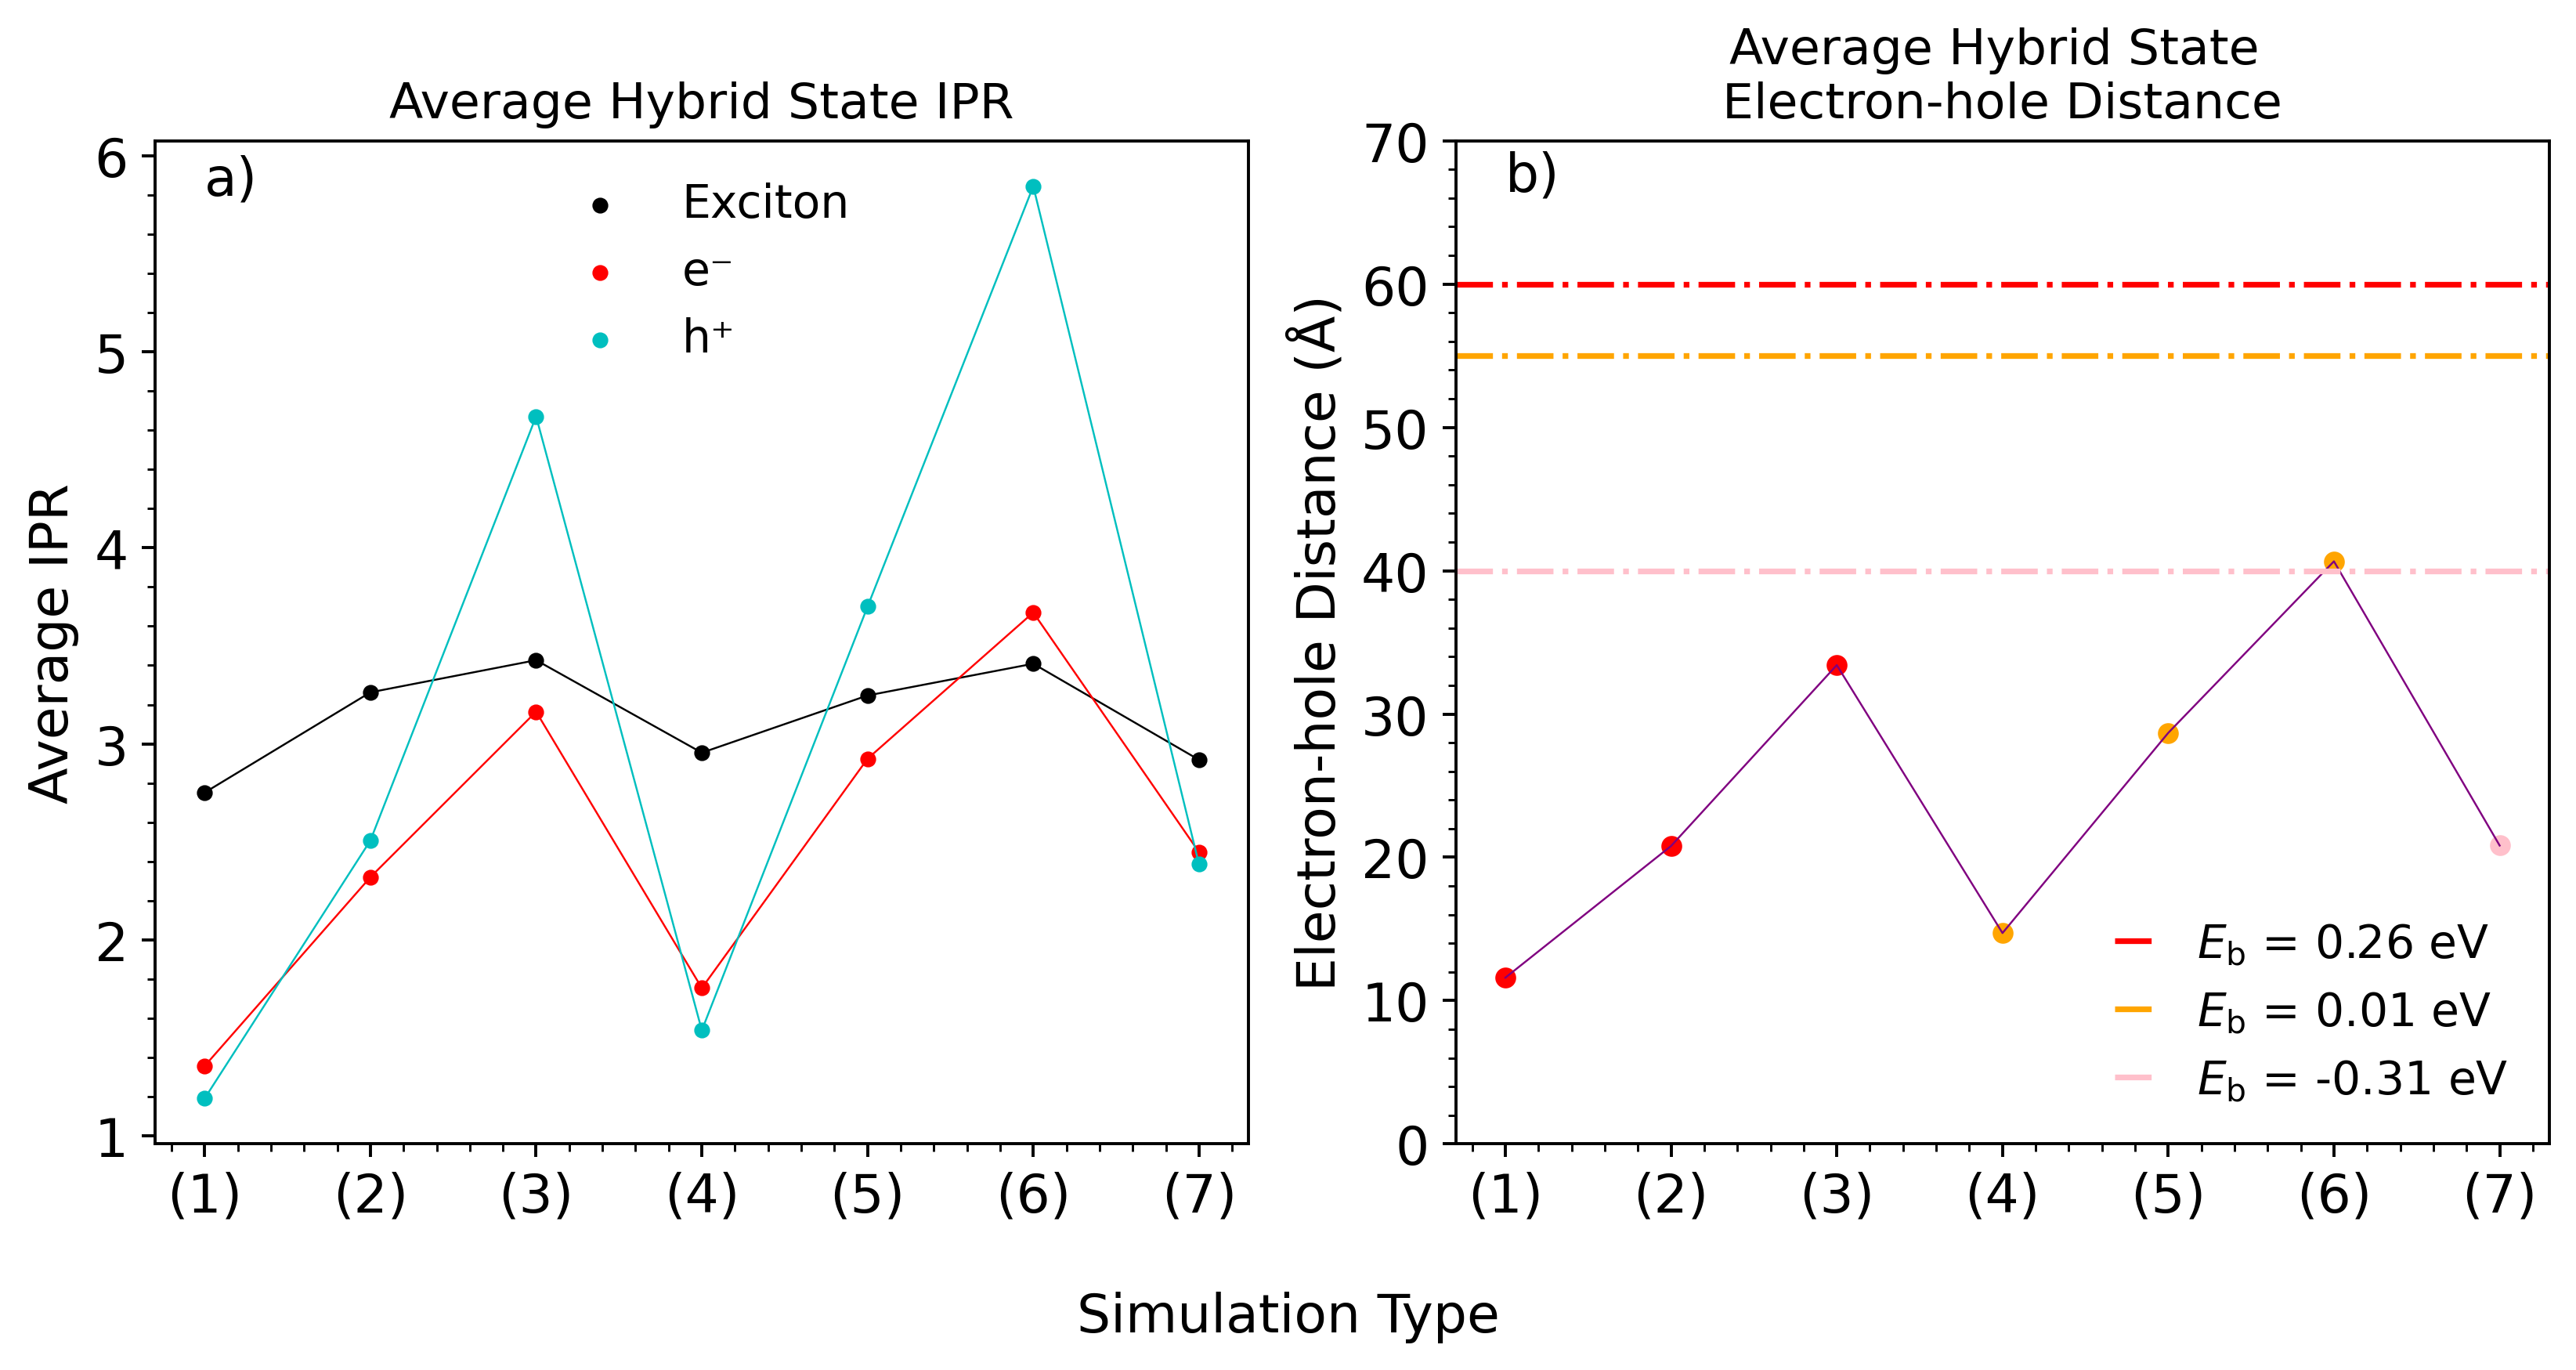

In [12]:
avg_eh_distances = [np.mean(arr[:,-2]) for arr in hybrid_arrays]
avg_exciton_ipr = [np.mean(arr[:,0]) for arr in hybrid_arrays]
avg_electron_ipr = [np.mean(arr[:,1]) for arr in hybrid_arrays]
avg_hole_ipr = [np.mean(arr[:,2]) for arr in hybrid_arrays]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9.5,5), rasterized=True, dpi=350)

simulation_type = ['(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)']
barrier_colours = ['r', 'r', 'r', 'orange', 'orange', 'orange', 'pink']

axs[0].scatter(simulation_type, avg_exciton_ipr, s=10, color='k', label='Exciton')
axs[0].plot(simulation_type, avg_exciton_ipr, linewidth=0.5, color='k')
axs[0].set_ylabel('Average IPR', fontsize=14)
axs[0].set_title('Average Hybrid State IPR', fontsize=13)
axs[0].yaxis.set_tick_params(labelsize = 14)
axs[0].xaxis.set_tick_params(labelsize = 14)
axs[0].minorticks_on()

axs[0].scatter(simulation_type, avg_electron_ipr, s=10, color='r', label = 'e\u207B')
axs[0].plot(simulation_type, avg_electron_ipr, linewidth=0.5, color='r')

axs[0].scatter(simulation_type, avg_hole_ipr, s=10, color='c', label = 'h\u207A')
axs[0].plot(simulation_type, avg_hole_ipr, linewidth=0.5, color='c')
axs[0].legend(loc='upper center', frameon=False, fontsize=12)
axs[0].text('(1)', 5.8, 'a)', fontsize=14)

axs[1].plot(simulation_type, avg_eh_distances, color='purple', linewidth=0.5)
axs[1].axhline(60, color='red', linestyle='dashdot', linewidth=1.5, label = '$E_\mathrm{b}$ = 0.26 eV')
axs[1].axhline(55, color='orange', linestyle='dashdot', linewidth=1.5, label = '$E_\mathrm{b}$ = 0.01 eV')
axs[1].axhline(40, color='pink', linestyle='dashdot', linewidth=1.5, label='$E_\mathrm{b}$ = -0.31 eV')

for k in range(len(simulation_type)):
    axs[1].scatter(simulation_type[k], avg_eh_distances[k], s=20, color=barrier_colours[k])

axs[1].set_ylabel('Electron-hole Distance (\u212B)', fontsize=14)
axs[1].set_title('Average Hybrid State \nElectron-hole Distance', fontsize=13)
axs[1].yaxis.set_tick_params(labelsize = 14)
axs[1].xaxis.set_tick_params(labelsize = 14)
axs[1].minorticks_on()
axs[1].set_ylim([0,70])
axs[1].legend(loc='lower right', frameon=False, fontsize=12, handlelength=1)
axs[1].text('(1)', 66.5, 'b)', fontsize=14)

fig.supxlabel('Simulation Type', fontsize=14)
fig.tight_layout()

In [13]:
eh_distance_bins = np.arange(0,220,20)[1:]
exciton_distance_bins = np.array([0,35,65,95])

e10_dresolved_acc_avg = accumulated_avg_by_distance(hybrid_arrays[2], 2, -2)

dresolved_exciton_ipr = [resolve_observable_by_distance(arr,0,-2,eh_distance_bins) for arr in hybrid_arrays]
dresolved_electron_ipr = [resolve_observable_by_distance(arr,1,-2,eh_distance_bins) for arr in hybrid_arrays]
dresolved_hole_ipr = [resolve_observable_by_distance(arr,2,-2,eh_distance_bins) for arr in hybrid_arrays]

dresolved_eh_dist = [resolve_observable_by_distance(arr,4,3,exciton_distance_bins[1:]) for arr in hybrid_arrays]

/homes/fivanovic/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homes/fivanovic/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


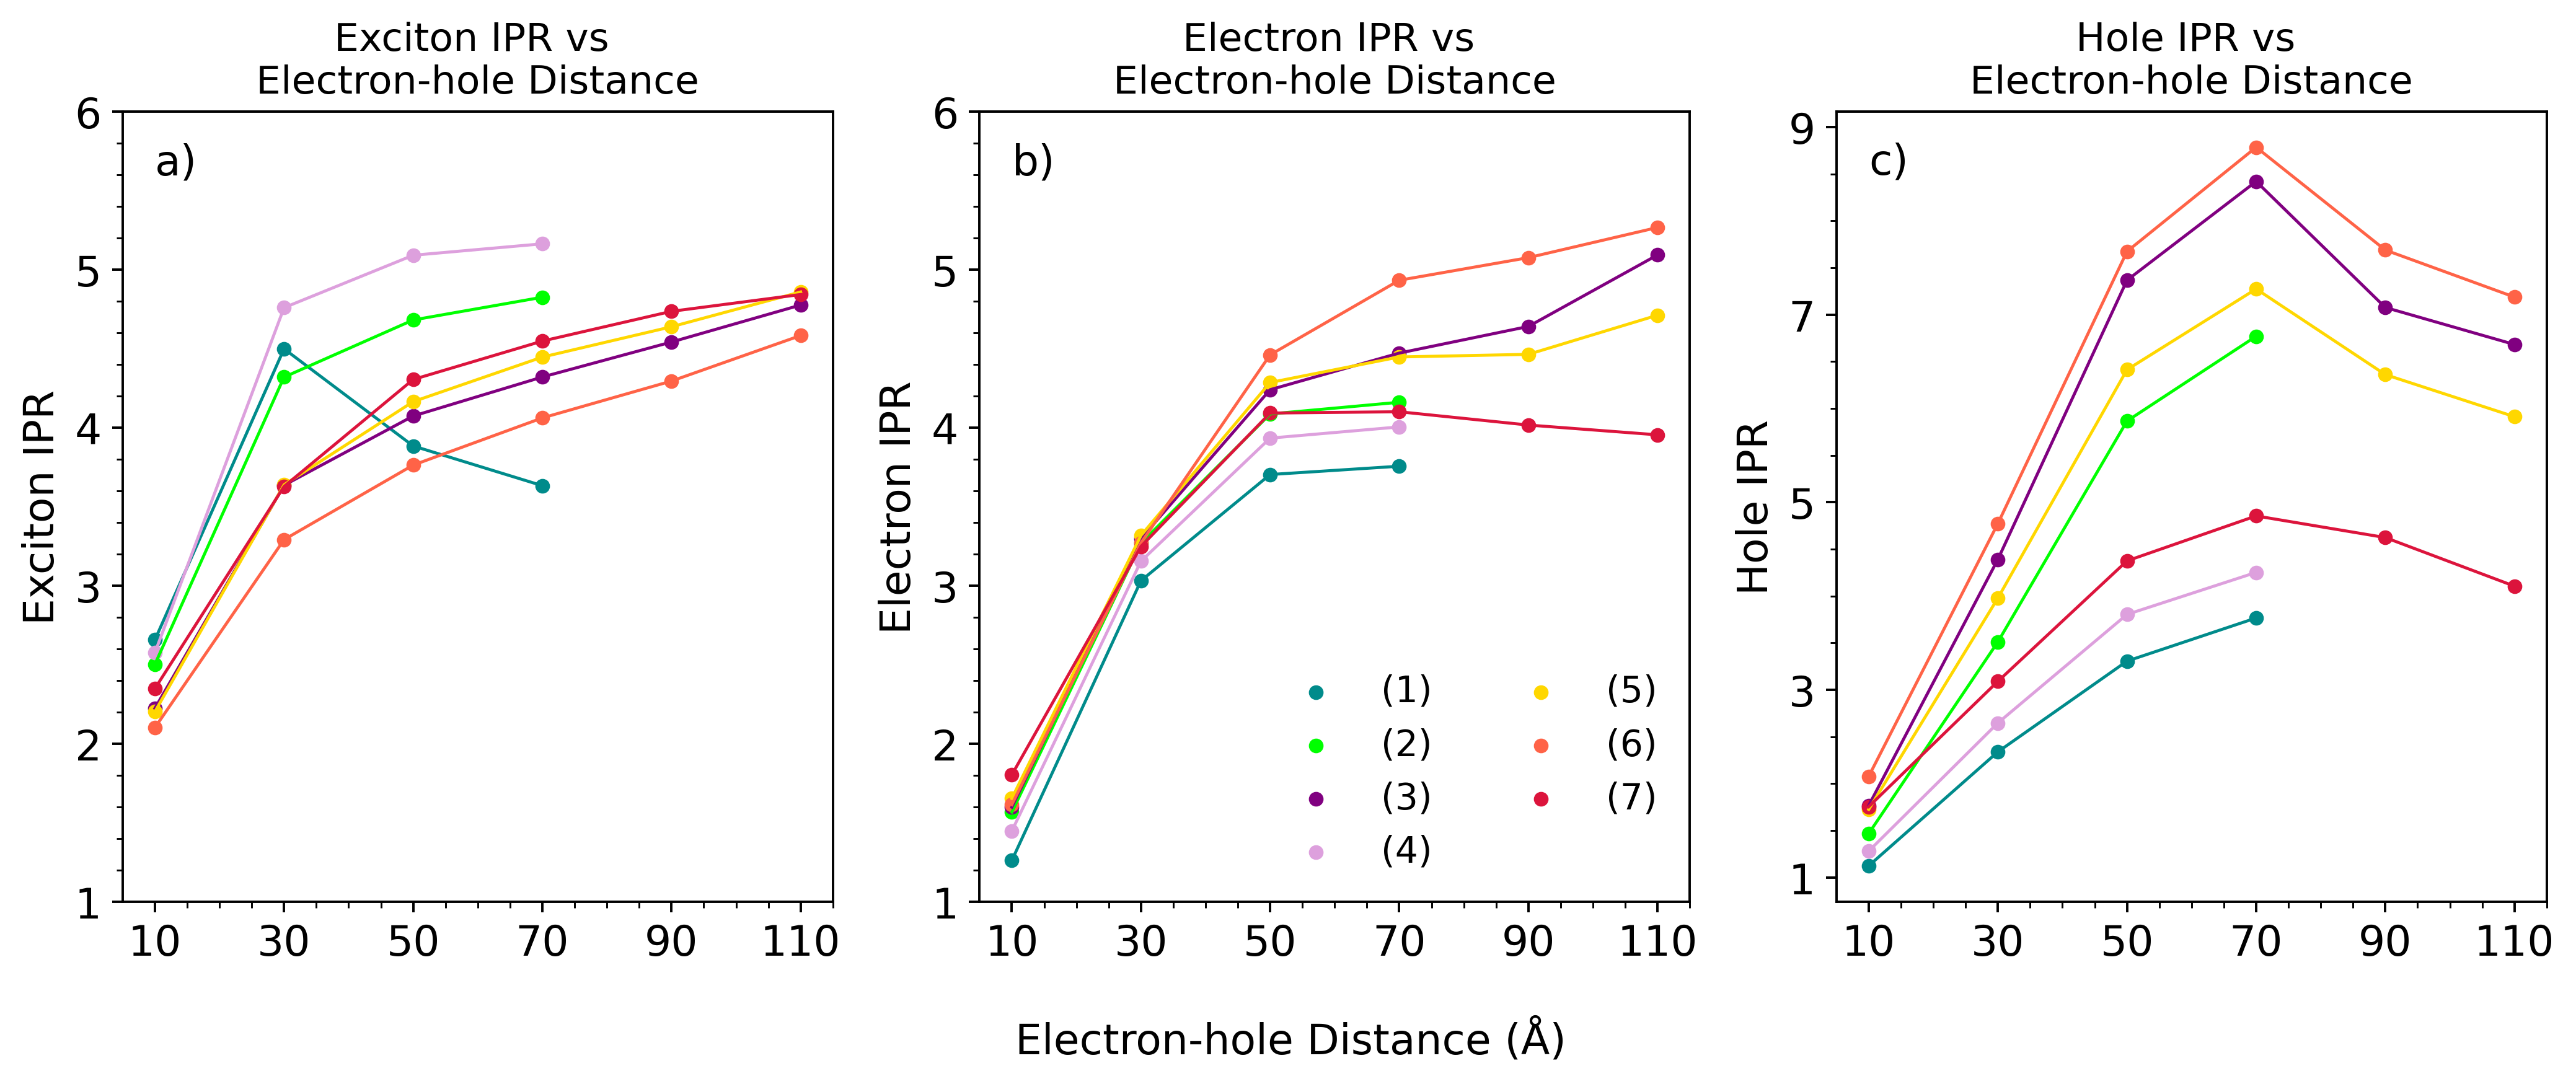

In [14]:
eh_distance_midpoints = np.arange(10,220,20)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5), rasterized=True, dpi=350)
label_list = ['(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)']
convergence_cutoffs = [4, 4, 6, 4, 6, 6, 6]
colour_list = ['darkcyan', 'lime', 'purple', 'plum', 'gold', 'tomato', 'crimson']

for k in range(len(dresolved_exciton_ipr)):

    axs[0].scatter(eh_distance_midpoints[:convergence_cutoffs[k]], dresolved_exciton_ipr[k][:convergence_cutoffs[k]], color=colour_list[k], s=15)
    axs[0].plot(eh_distance_midpoints[:convergence_cutoffs[k]], dresolved_exciton_ipr[k][:convergence_cutoffs[k]], color=colour_list[k], linewidth=1)
    axs[0].set_ylabel('Exciton IPR', fontsize=14)
    axs[0].set_title('Exciton IPR vs \nElectron-hole Distance', fontsize=13)
    axs[0].yaxis.set_tick_params(labelsize = 14)
    axs[0].xaxis.set_tick_params(labelsize = 14)
    axs[0].minorticks_on()
    axs[0].set_yticks([1,2,3,4,5,6])
    axs[0].set_xticks(eh_distance_midpoints[:convergence_cutoffs[6]])

    axs[1].scatter(eh_distance_midpoints[:convergence_cutoffs[k]], dresolved_electron_ipr[k][:convergence_cutoffs[k]], color=colour_list[k], s=15, label=label_list[k])
    axs[1].plot(eh_distance_midpoints[:convergence_cutoffs[k]], dresolved_electron_ipr[k][:convergence_cutoffs[k]], color=colour_list[k], linewidth=1)
    axs[1].set_ylabel('Electron IPR', fontsize=14)
    axs[1].set_title('Electron IPR vs \nElectron-hole Distance', fontsize=13)
    axs[1].yaxis.set_tick_params(labelsize = 14)
    axs[1].xaxis.set_tick_params(labelsize = 14)
    axs[1].minorticks_on()
    axs[1].set_yticks([1,2,3,4,5,6])
    axs[1].set_xticks(eh_distance_midpoints[:convergence_cutoffs[6]])
    axs[1].legend(loc='lower right', fontsize=12, frameon=False, ncols=2)

    axs[2].scatter(eh_distance_midpoints[:convergence_cutoffs[k]], dresolved_hole_ipr[k][:convergence_cutoffs[k]], color=colour_list[k], s=15)
    axs[2].plot(eh_distance_midpoints[:convergence_cutoffs[k]], dresolved_hole_ipr[k][:convergence_cutoffs[k]], color=colour_list[k], linewidth=1)
    axs[2].set_ylabel('Hole IPR', fontsize=14)
    axs[2].set_title('Hole IPR vs \nElectron-hole Distance', fontsize=13)
    axs[2].yaxis.set_tick_params(labelsize = 14)
    axs[2].xaxis.set_tick_params(labelsize = 14)
    axs[2].minorticks_on()
    axs[2].set_yticks([1,3,5,7,9])
    axs[2].set_xticks(eh_distance_midpoints[:convergence_cutoffs[6]])

axs[0].text(10, 5.6, 'a)', fontsize=14)
axs[1].text(10, 5.6, 'b)', fontsize=14)
axs[2].text(10, 8.5, 'c)', fontsize=14)

fig.supxlabel('Electron-hole Distance (\u212B)', fontsize=14)
fig.tight_layout()

In [15]:
def plot_hotgen_proportions(ax_object, path, simulation, file_keyword, distance_bins, distance_midpoints, input_colour, input_label, bar_width):

    hotgen_proportions = []

    hotgen_distances = np.loadtxt(path + f'{simulation}/{file_keyword}_hGen_dissociation_distances.txt') - 92
    total_distances = np.loadtxt(path + f'{simulation}/{file_keyword}_all_dissociation_distances.txt') - 92

    for index in range(1, len(distance_bins)):
        upper_bin = distance_bins[index]
        lower_bin = distance_bins[index-1]

        binned_indices = np.where(hotgen_distances < upper_bin)[0]
        binned_hotgen = hotgen_distances[binned_indices]

        binned_indices = np.where(binned_hotgen >= lower_bin)[0]
        binned_hotgen = binned_hotgen[binned_indices]

        binned_indices = np.where(total_distances < upper_bin)[0]
        binned_total = total_distances[binned_indices]
        binned_indices = np.where(binned_total >= lower_bin)[0]
        binned_total = binned_total[binned_indices]

        hotgen_proportions.append(len(binned_hotgen)*100/len(binned_total))

    #ax_object.scatter(distance_midpoints, hotgen_proportions, color=input_colour, s=20, label=input_label)
    ax_object.bar(distance_midpoints, hotgen_proportions, color=input_colour, width=bar_width, label=input_label, alpha=0.8)

Text(0.5, 0.01, 'Exciton Distance (Å)')

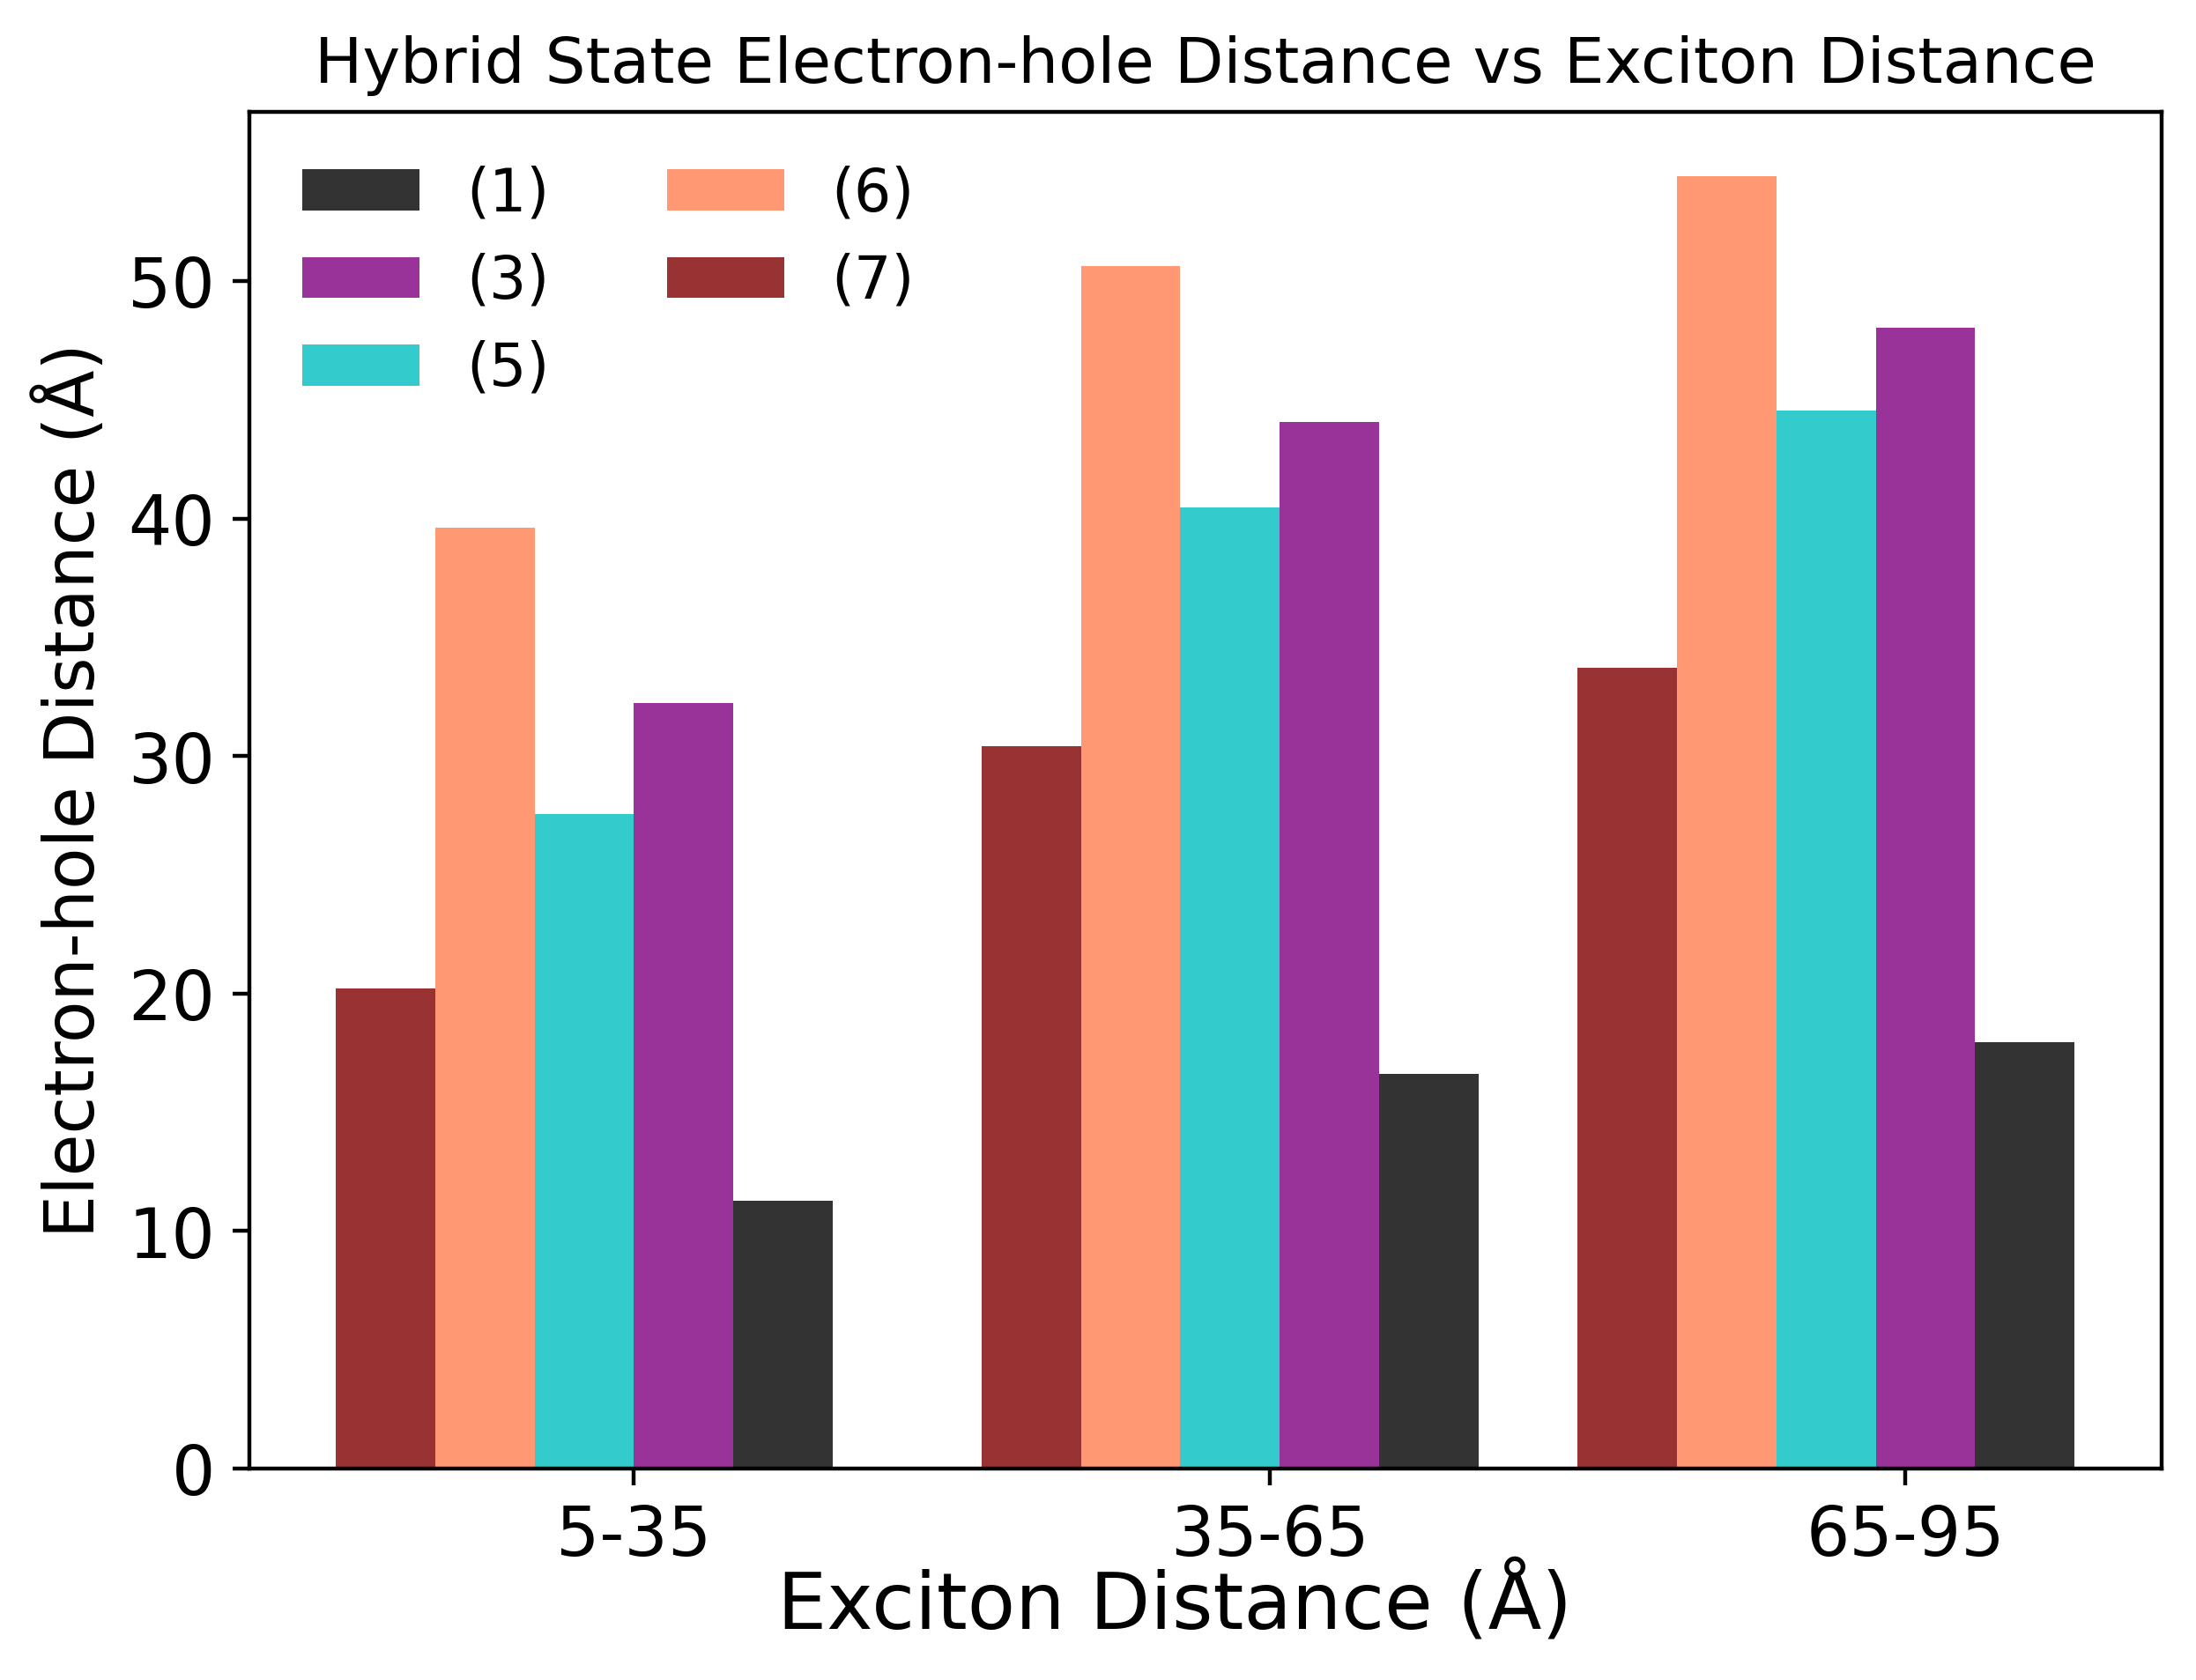

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5), rasterized=True, dpi=400)

exciton_distance_midpoints = np.array([17.5, 50, 80])
path = 'saved_wf_processing/dissociation_info/'
state_list = ['all', 'hGen']
simulation_subpaths = ['physical_system_optical_retry', 'epsilon3.5_2xCTcoup', 'epsilon3.5_3xCTcoup', 'epsilon5_offset0.4', 'epsilon5_2xCTcoup', 'epsilon5_3xCTcoup', 'epsilon10_offset0.4']
width_list = [32, 0, 28, 0, 22, 18, 14]
colour_list = ['k', 0, 'purple', 0, 'c', 'coral', 'maroon']

shift_counter = 0
for k in range(len(dresolved_exciton_ipr)):

    if (k == 1) or (k == 3):
        continue

    axs.bar(exciton_distance_midpoints-shift_counter*5, dresolved_eh_dist[k], color=colour_list[k], width=5, alpha=0.8, label=label_list[k])
    axs.set_ylabel('Electron-hole Distance (\u212B)', fontsize=14)
    axs.set_title('Hybrid State Electron-hole Distance vs Exciton Distance', fontsize=13)
    axs.yaxis.set_tick_params(labelsize = 14)
    axs.xaxis.set_tick_params(labelsize = 14)

    shift_counter += 1

#    plot_hotgen_proportions(axs[1], path, simulation_subpaths[k],file_tags[k], exciton_distance_bins, exciton_distance_midpoints, colour_list[k], label_list[k], width_list[k])
#    axs[1].set_title('Percentage Hot Generation vs Dissociation Distance', fontsize=13)
#    axs[1].set_ylabel('% Trajectories via Hot Pathway', fontsize=14)
#    axs[1].yaxis.set_tick_params(labelsize = 14)
#    axs[1].xaxis.set_tick_params(labelsize = 14)
#    axs[1].minorticks_on()
#    axs[1].set_ylim([0,100])

#axs.text(3, 53, 'a)', fontsize=14)
#axs[1].text(3, 93, 'b)', fontsize=14)

#axs.axvline(5, linewidth=2, color='k', linestyle='--', label='Interfacial Distance')
#axs.axvline(95, linewidth=2, color='b', linestyle='--', label='Maximum Distance')
#axs[1].axvline(5, linewidth=2, color='k', linestyle='--', label='Interfacial Distance')
#axs[1].axvline(95, linewidth=2, color='b', linestyle='--', label='Maximum Distance')

axs.set_xticks([10,42,74], ['5-35','35-65','65-95'])

axs.legend(loc='best', frameon=False, fontsize=12, ncols=2)
fig.supxlabel('Exciton Distance (\u212B)', fontsize=16)